# Downloading information from WRDS for the company *FrieslandCampina*

### The data is from Bureau van Dijk(BvD)'s database Amadeus, concerning only European companies

* Link to the Wharton's website: [WRDS](https://wrds-web.wharton.upenn.edu/wrds/)


In [1]:
import wrds
import pandas as pd
from sqlalchemy import create_engine, text

#establishing connection
db = wrds.Connection(wrds_username ='tycho1')

Loading library list...
Done


In [3]:
db.list_libraries()

['public',
 'wrds_lib_internal',
 'centris',
 'gsi',
 'rent',
 'wrdsapps',
 'wrdsapps_evtravtaq',
 'wrdsapps_finratios',
 'eureka',
 'ims',
 'ktmine',
 'secsamp_all_new',
 'compnad',
 'twoiq',
 'frb_all_new',
 'ginsight',
 'crsp_a_ziman',
 'crsp_q_ziman',
 'blab',
 'lspd',
 'ravenpack_trial',
 'optionmsamp_us',
 'optionmsamp_europe',
 'ff_all_new',
 'crsp_a_ccm',
 'crsp_a_indexes',
 'crsp_a_stock',
 'crsp_q_ccm',
 'crsp_q_indexes',
 'trws',
 'crsp_q_stock',
 'bvd_osiris',
 'risk_governance',
 'secsamp',
 'levin',
 'risk_directors',
 'tass',
 'hfr',
 'ims_obp_trial',
 'macrofin_comm_trade',
 'comp_segments_hist',
 'audit_audit_comp',
 'infogroupsamp_business',
 'infogroupsamp_residential',
 'compm',
 'ktmine_patents_samp',
 'macrofin',
 'crspa',
 'boardex_trial',
 'comp_bank',
 'compb',
 'snlsamp_fig',
 'ftse',
 'audit',
 'etfg_samp',
 'csmar',
 'etfgsamp',
 'dealscan',
 'bvd_ama_large',
 'compa',
 'bvd_ama_small',
 'bvd_ama_medium',
 'bvd_ama_verylarge',
 'tr_ibes',
 'compsamp_snapshot

In [4]:
db.list_tables('bvd')

['osiris_qvards',
 'os_activ_asicuscde',
 'os_activ_ftinclas',
 'os_activ_nace2scde',
 'os_activ_nacescde',
 'os_activ_naics12cde',
 'os_activ_paics12cod',
 'os_activ_pnace2cd',
 'os_activ_pnacecd',
 'os_activ_psicuscde',
 'os_do',
 'os_fin_bnk',
 'os_fin_ind',
 'os_fin_ins',
 'os_gen',
 'os_gen_advisor',
 'os_gen_manager',
 'os_io',
 'os_shh',
 'os_stock_exchanges',
 'os_stock_header',
 'os_stock_indexes',
 'os_stock_monthly',
 'os_stock_ratios',
 'os_stock_weekly',
 'os_sub',
 'os_uo',
 'bankscope_qvards',
 'bs_bank',
 'bs_companions',
 'bs_directors',
 'bs_financials',
 'bs_ish_guo_duo',
 'bs_overview',
 'bs_shareholders',
 'bs_stock_annual',
 'bs_stock_current',
 'bs_stock_indexes',
 'bs_stock_info',
 'bs_stock_monthly',
 'bs_stock_places',
 'bs_stock_weekly',
 'bs_subsidiaries',
 'is_alsoknown',
 'is_auditors',
 'is_duo',
 'is_fin_com',
 'is_fin_lif',
 'is_fin_nl',
 'is_formerknown',
 'is_gen',
 'is_io',
 'is_managers',
 'is_ownhdr',
 'is_shh',
 'is_stock_exchanges',
 'is_stock_he

In [6]:
db.describe_table(library='bvd', table='financials_l')

Approximately 3529400 rows in bvd.financials_l.


,name,nullable,type
0,idnr,True,VARCHAR(15)
1,country,True,VARCHAR(22)
2,repbas,True,VARCHAR(24)
3,closdate,True,DATE
4,closdate_year,True,DOUBLE PRECISION
5,accpra,True,VARCHAR(10)
6,months,True,DOUBLE PRECISION
7,unit,True,DOUBLE PRECISION
8,currency,True,VARCHAR(3)
9,exchrate,True,DOUBLE PRECISION


In [23]:
#downloading small companies
dfFriesland_s = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_s as bf  \
                                 INNER JOIN bvd.company_s as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [24]:
#downloading medium size companies
dfFriesland_m = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_m as bf  \
                                 INNER JOIN bvd.company_m as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [25]:
#downloading large size companies
dfFriesland_l = db.raw_sql(text("SELECT *, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_l as bf  \
                                 INNER JOIN bvd.company_l as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [26]:
#downloading very large size companies
dfFriesland_v = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_v as bf  \
                                 INNER JOIN bvd.company_v as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [2]:
#the names of the companies
dfFriesland_names = db.raw_sql(text("SELECT bc.name, bc.idnr \
                                    FROM bvd.company_l as bc \
                                    WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [3]:
dfFriesland_names

,name,idnr
0,FRIESLANDCAMPINA BREE,BE0478547322
1,FRIESLANDCAMPINA BELGIUM CHEESE,BE0419250133
2,FRIESLANDCAMPINA,BE0478847725
3,FRIESLANDCAMPINA AUSTRIA GMBH,AT9030036068
4,FRIESLANDCAMPINA CANARIAS SA,ESA35005685
5,MILCHVERWALTUNG FRIESLANDCAMPINA GERMANY GMBH,DE5190622172
6,FRIESLANDCAMPINA ROMANIA S.A.,RO6632642
7,FRIESLANDCAMPINA IBERIA SL,ESB63544134
8,FRIESLANDCAMPINA HUNGARIA KERESKEDELMI ES TERM...,HU12876992
9,FRIESLANDCAMPINA UK LIMITED,GB04684097


In [27]:
# combining the 4 dataframes into one
df = dfFriesland_s.append(dfFriesland_m)
df = df.append(dfFriesland_l)
df = df.append(dfFriesland_v)
df.shape

(251, 132)

In [38]:
df.to_csv(r'dataFrisCamp.csv') #saving to csv file

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

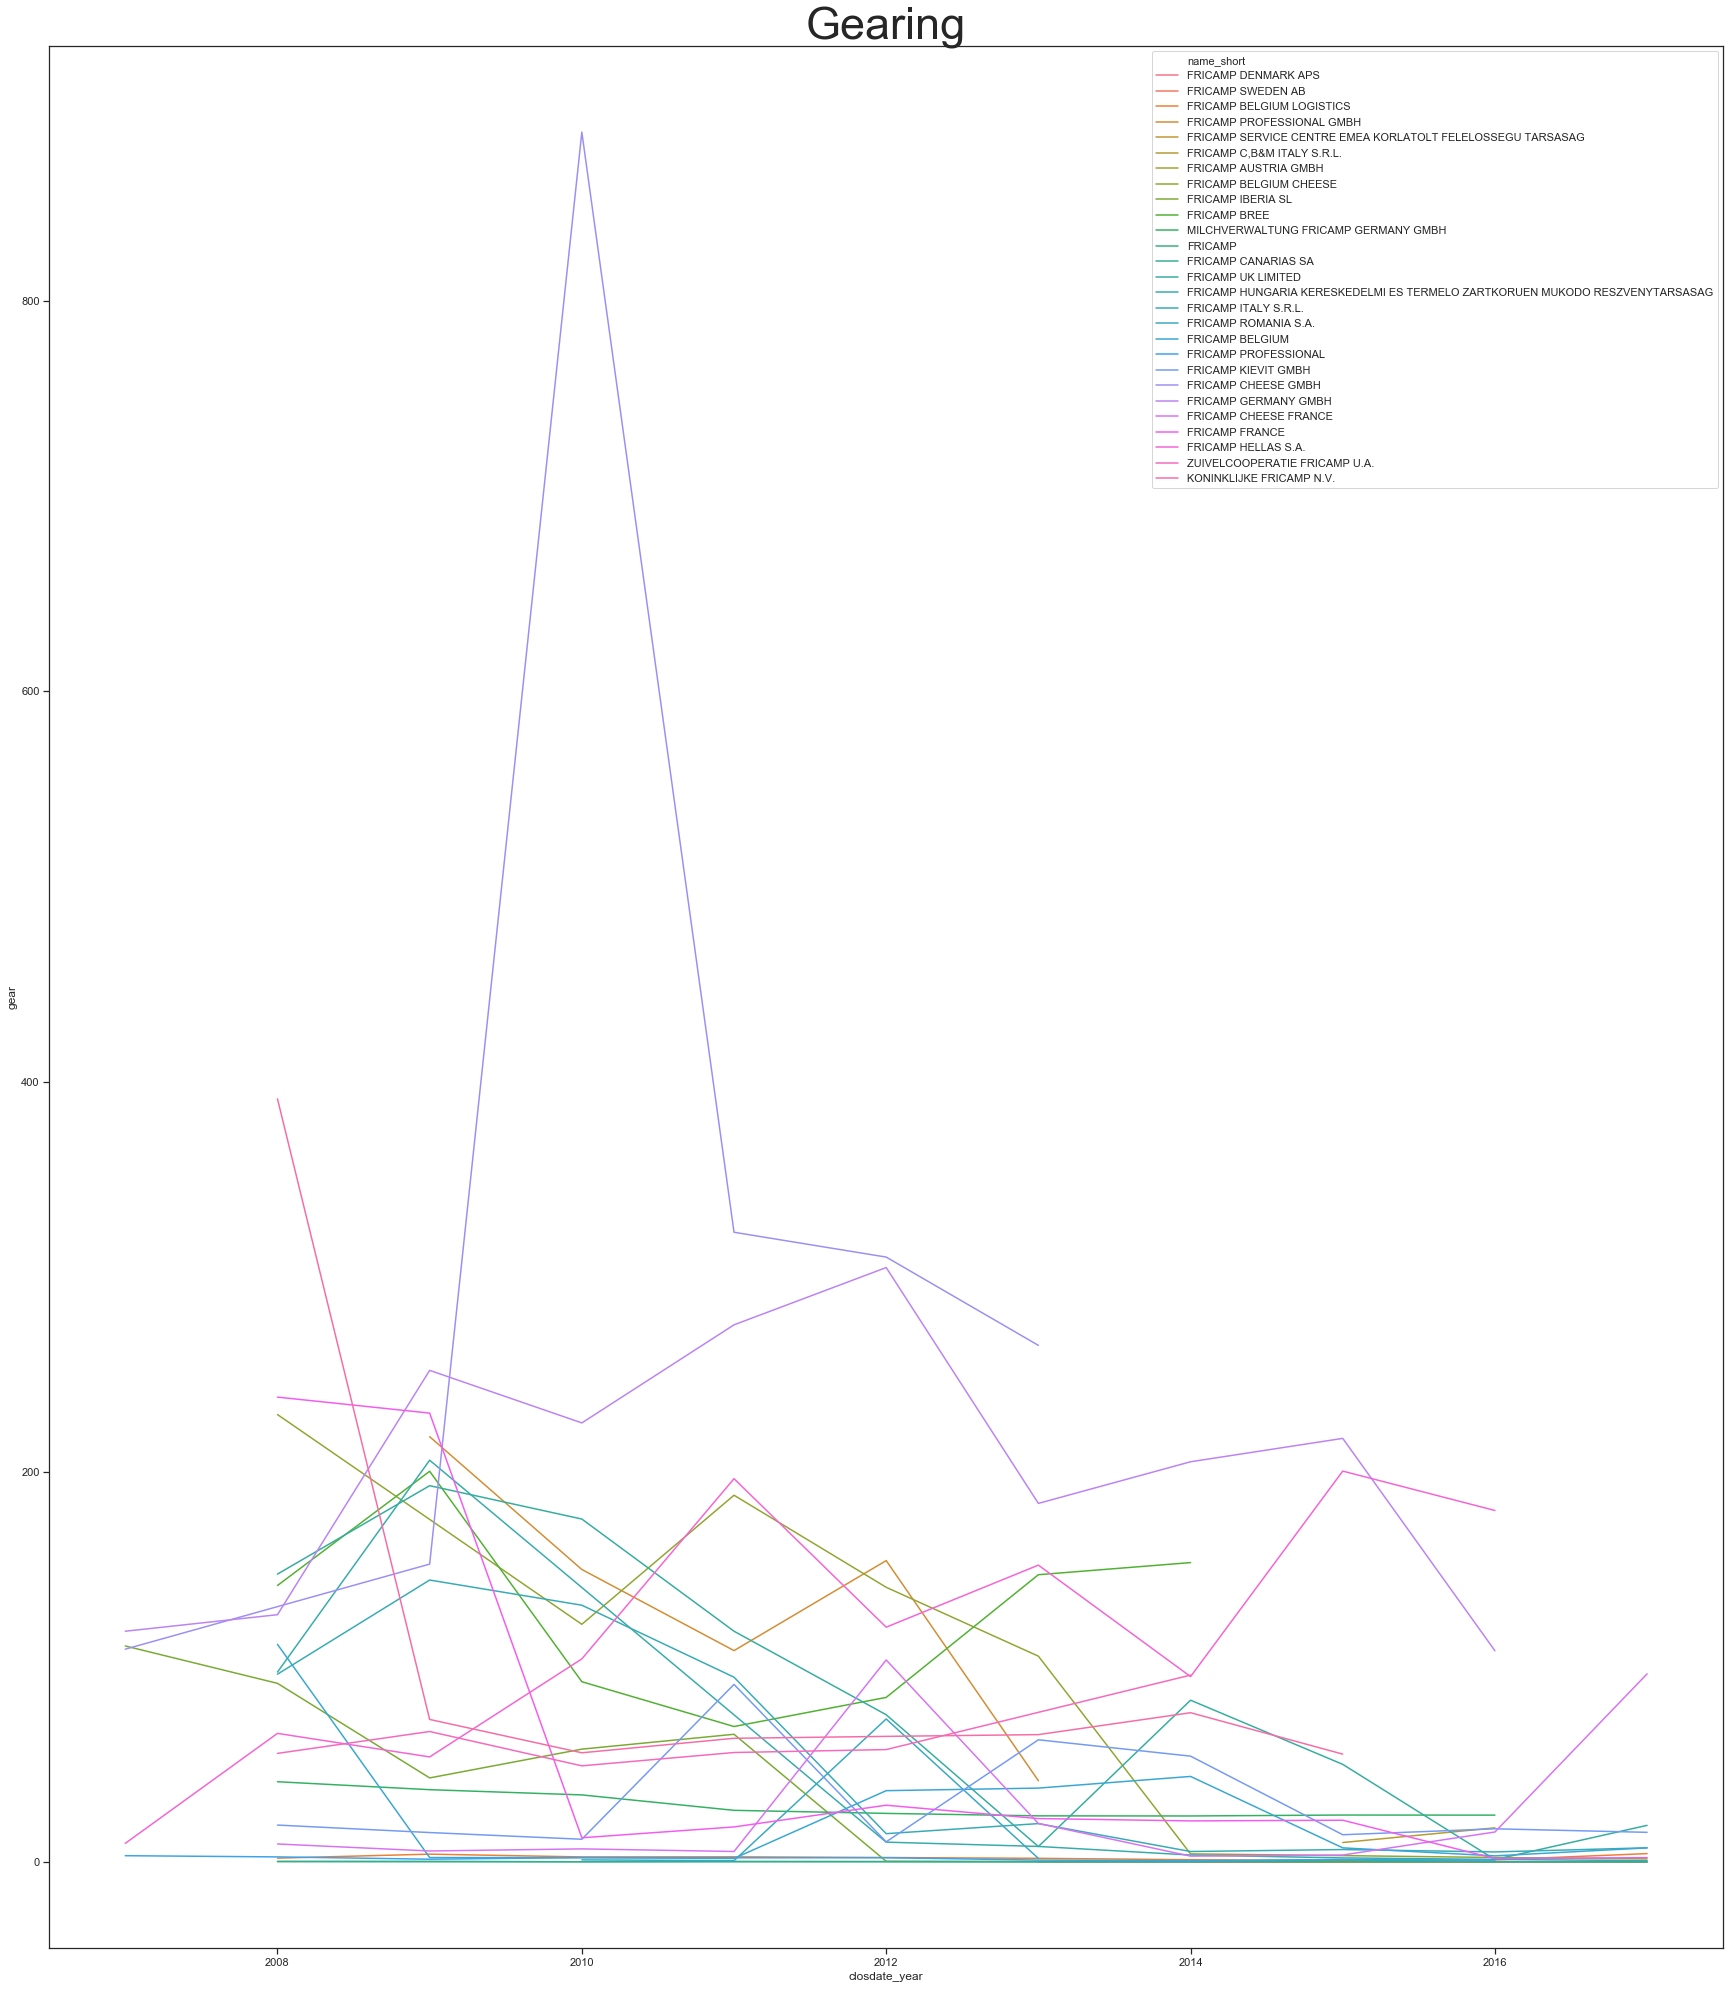

In [41]:
g1 = sns.lineplot(x="closdate_year",y="gear",hue="name_short",
             data = df[["closdate_year","gear","name_short"]].dropna()) \
             .set_title("Gearing", fontsize = 45)
plt.rcParams['figure.figsize']=(30,35)

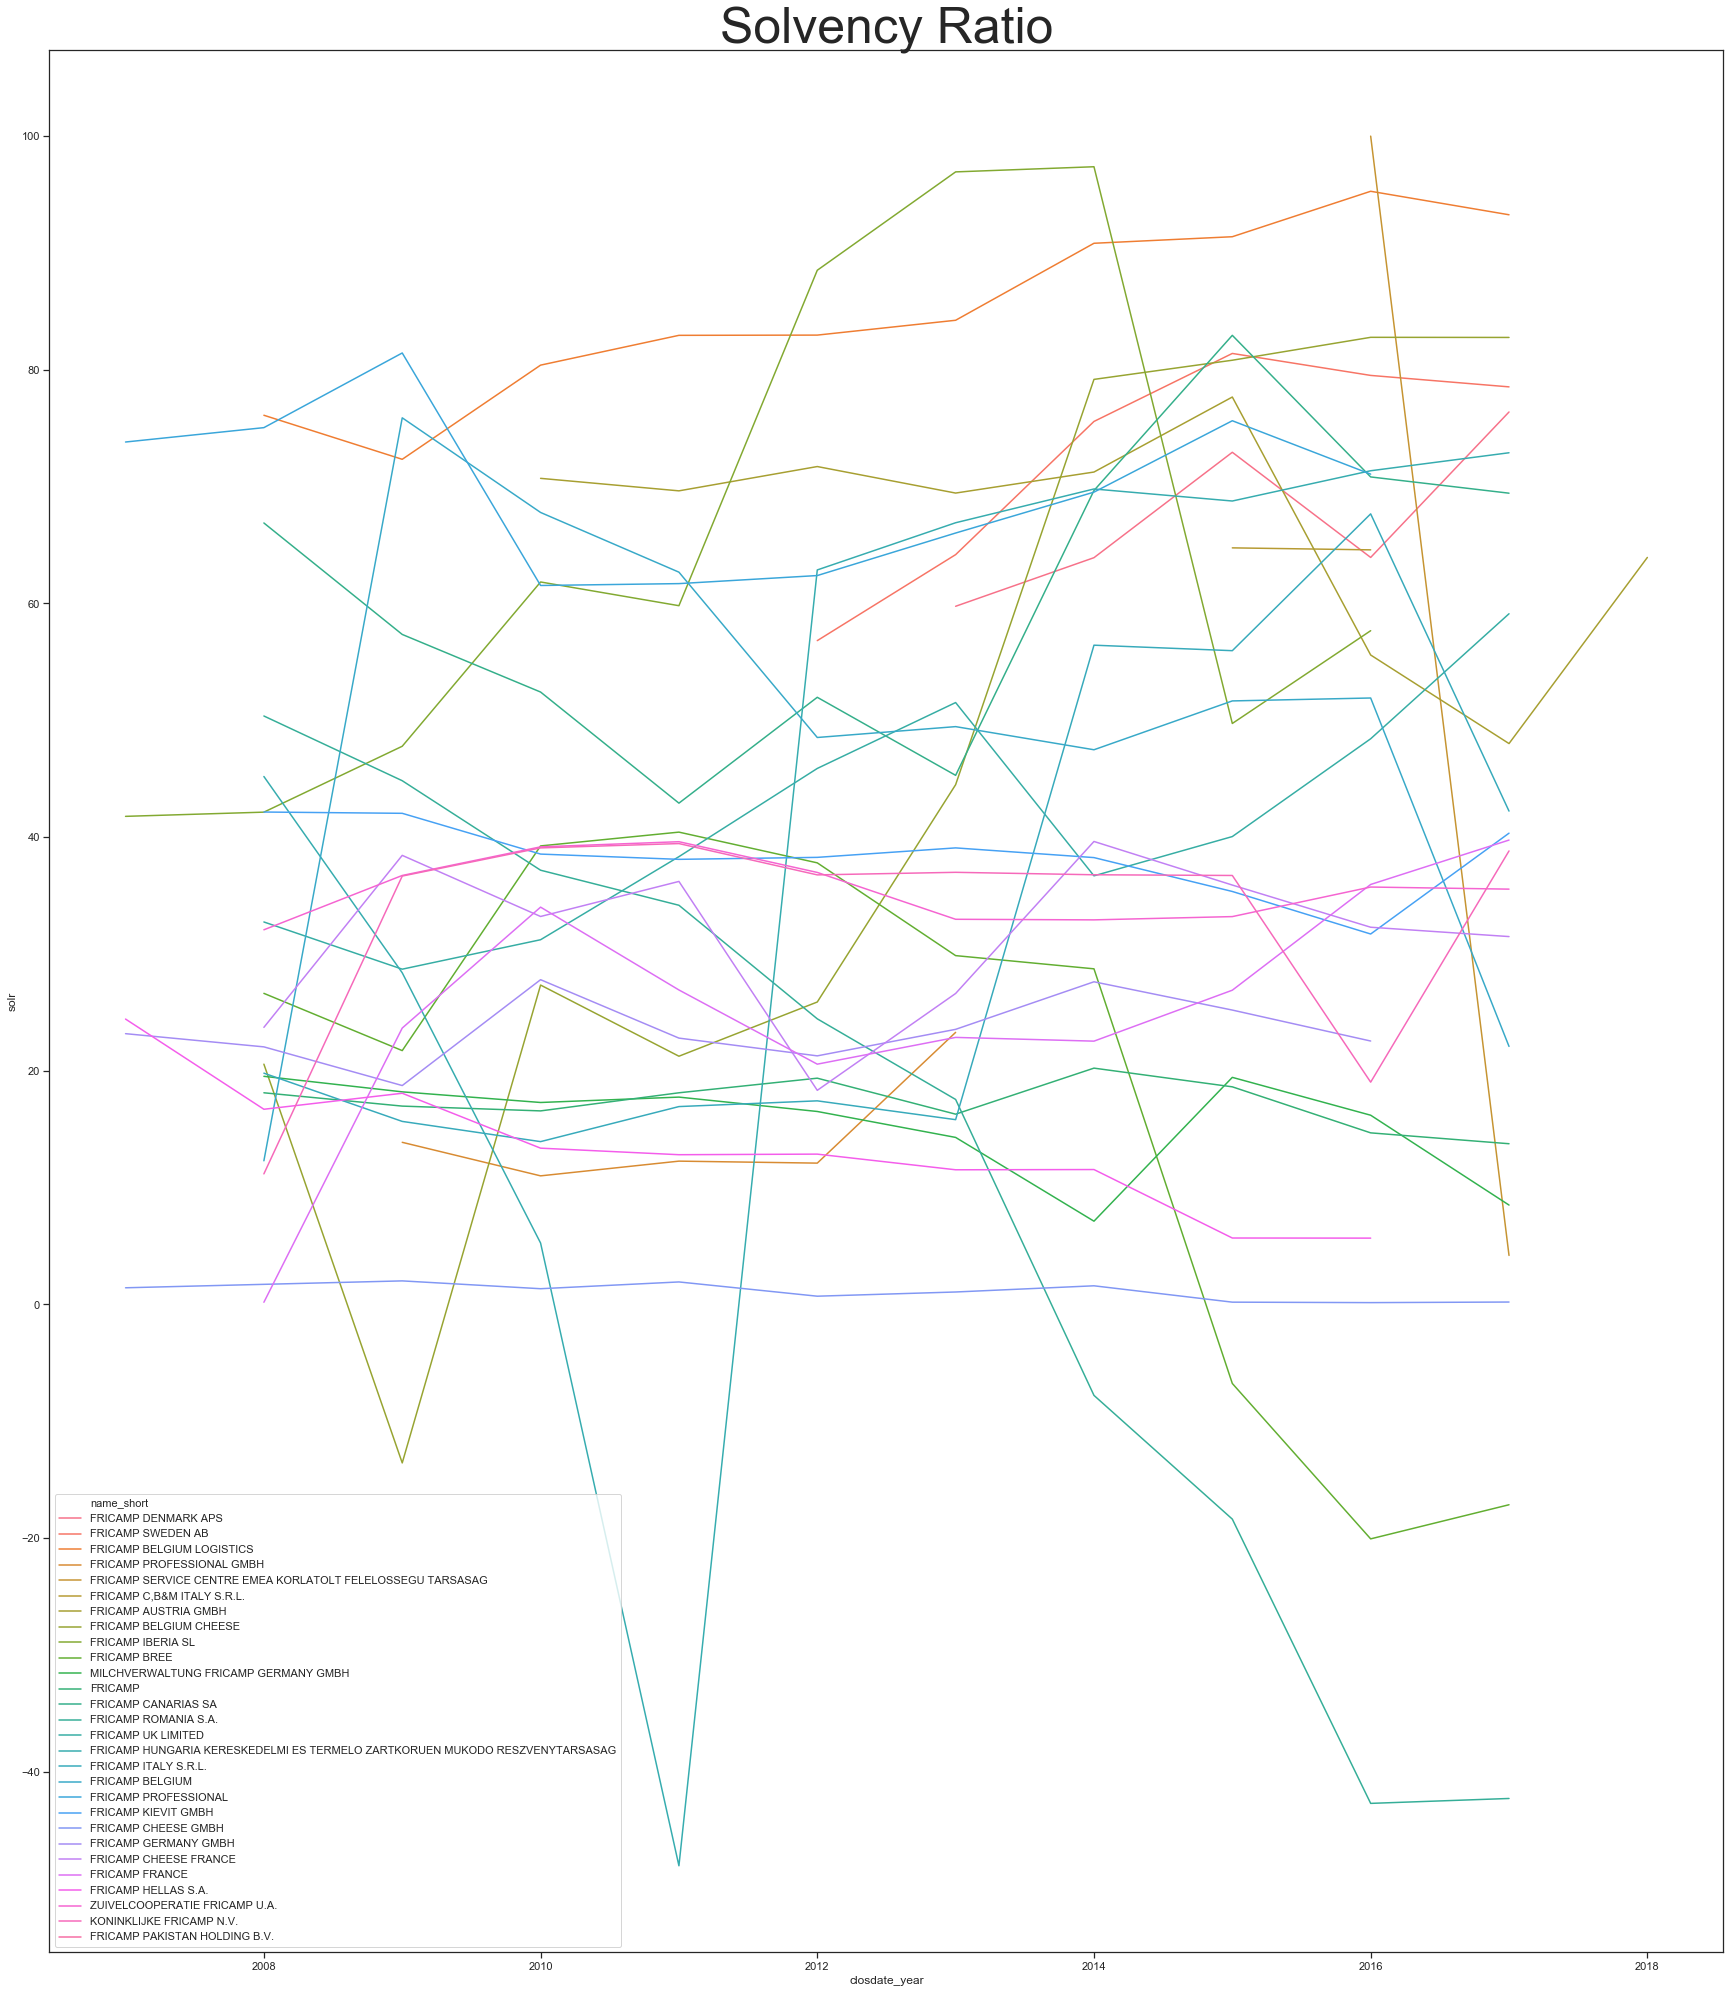

In [42]:
g = sns.lineplot(x="closdate_year",y="solr",hue="name_short",
                 data = df[["closdate_year","solr","name_short"]].dropna()) \
                 .set_title("Solvency Ratio",fontsize =50)
    
#g.set_fontsize(20)
plt.rcParams['figure.figsize']=(45,30)


### Here is a link to a Tableau Story/Dashboard with analysis of the data downloaded in this notebook

[link to Tableau](https://public.tableau.com/profile/tihomir7992#!/vizhome/Story_FrieslandCampina/Story1)

# Part II

* Looking at alternative selection of companies, based on ownershop structure
* For that purpose I use the tabel 'ish_duo_guo'

In [43]:
pd.read_csv("dataFrisCamp.csv").head()

,Unnamed: 0,idnr,country,repbas,closdate,closdate_year,accpra,months,unit,currency,...,compcat.1,trdesen,tradedes,pgid,pgname,pgdesc,pgsize,statusdate_char,dateinc_char,name_short
0,0,NL09172592,NETHERLANDS,Limited Fin. Data,NaN,2007.0,Local GAAP,12.0,3.0,EUR,...,SMALL,NaN,De productie van marketing van en de verkoop ...,10324.0,1032 SM,Manufacture of fruit and vegetable juice (Smal...,903.0,10/01/2019,01/07/2007,FRICAMP ROCKET B.V.
1,1,FI26910467,FINLAND,Limited Fin. Data,NaN,2015.0,Local GAAP,12.0,0.0,EUR,...,SMALL,NaN,NaN,46334.0,4633 SM,"Wholesale of dairy products, eggs and edible o...",6220.0,NaN,NaN,FRICAMP CONSUMER PRODUCTS EUROPE B.V.
2,2,FI26910467,FINLAND,Limited Fin. Data,NaN,2016.0,Local GAAP,12.0,0.0,EUR,...,SMALL,NaN,NaN,46334.0,4633 SM,"Wholesale of dairy products, eggs and edible o...",6220.0,NaN,NaN,FRICAMP CONSUMER PRODUCTS EUROPE B.V.
3,3,FI26910467,FINLAND,Limited Fin. Data,NaN,2017.0,Local GAAP,12.0,0.0,EUR,...,SMALL,NaN,NaN,46334.0,4633 SM,"Wholesale of dairy products, eggs and edible o...",6220.0,NaN,NaN,FRICAMP CONSUMER PRODUCTS EUROPE B.V.
4,4,DK33862423,DENMARK,Unconsolidated data,2013-12-31,2013.0,Local GAAP,12.0,0.0,DKK,...,SMALL,NaN,NaN,10843.0,1084 ME,Manufacture of condiments and seasonings (Medi...,709.0,NaN,26/07/2011,FRICAMP DENMARK APS


In [4]:
db.describe_table(library='bvd', table='ish_duo_guo_l')

Approximately 282043 rows in bvd.ish_duo_guo_l.


,name,nullable,type
0,idnr,True,VARCHAR(15)
1,country,True,VARCHAR(22)
2,ish_name,True,VARCHAR(199)
3,ish_bvdepnr,True,VARCHAR(20)
4,ish_tick,True,VARCHAR(12)
5,ish_cntry,True,VARCHAR(2)
6,ish_city,True,VARCHAR(66)
7,ish_type,True,VARCHAR(1)
8,ish_nace,True,VARCHAR(4)
9,ish_naics,True,VARCHAR(4)


In [28]:
print(len(pd.unique(df['name_short'])))
pd.Series(pd.unique(df['name']))

30


0        FRIESLANDCAMPINA CONSUMER PRODUCTS EUROPE B.V.
1                          FRIESLANDCAMPINA DENMARK APS
2                          FRIESLANDCAMPINA ROCKET B.V.
3                            FRIESLANDCAMPINA SWEDEN AB
4                    FRIESLANDCAMPINA BELGIUM LOGISTICS
5     FRIESLANDCAMPINA SERVICE CENTRE EMEA KORLATOLT...
6                    FRIESLANDCAMPINA PROFESSIONAL GMBH
7                   FRIESLANDCAMPINA C,B&M ITALY S.R.L.
8                                 FRIESLANDCAMPINA BREE
9                       FRIESLANDCAMPINA BELGIUM CHEESE
10                        FRIESLANDCAMPINA AUSTRIA GMBH
11                        FRIESLANDCAMPINA ITALY S.R.L.
12                                     FRIESLANDCAMPINA
13        MILCHVERWALTUNG FRIESLANDCAMPINA GERMANY GMBH
14                           FRIESLANDCAMPINA IBERIA SL
15                          FRIESLANDCAMPINA UK LIMITED
16                         FRIESLANDCAMPINA CANARIAS SA
17    FRIESLANDCAMPINA HUNGARIA KERESKEDELMI ES 

In [67]:
#downloading very large size companies
dfFriesland_v_owner = db.raw_sql(text("SELECT * \
                                 FROM bvd.ish_duo_guo_v as bn  \
                                 WHERE bn.guo_name LIKE '%FRIESLANDCAMPINA%' ; "))
dfFriesland_v_owner.shape

(11, 55)

In [68]:
dfFriesland_v_owner.T

,0,1,2,3,4,5,6,7,8,9,10
idnr,BE0402814175,BE0832679870,DE4290079764,DE5110188872,DE7070184256,FR304202328,FR304635493,GR000350101000,NL11057544,NL65968484,RU18255315
country,BELGIUM,BELGIUM,GERMANY,GERMANY,GERMANY,FRANCE,FRANCE,GREECE,NETHERLANDS,NETHERLANDS,RUSSIAN FEDERATION
ish_name,FRIESLANDCAMPINA INTERNATIONAL HOLDING B.V.,FRIESLANDCAMPINA INVESTMENTS HOLDING B.V.,FRIESLANDCAMPINA GERMANY GMBH,FRIESLANDCAMPINA GERMANY GMBH,KONINKLIJKE FRIESLANDCAMPINA N.V.,FRIESLANDCAMPINA FRANCE,ZUIVELCOOPERATIE FRIESLANDCAMPINA U.A.,ZUIVELCOOPERATIE FRIESLANDCAMPINA U.A.,ZUIVELCOOPERATIE FRIESLANDCAMPINA U.A.,KONINKLIJKE FRIESLANDCAMPINA N.V.,KONINKLIJKE FRIESLANDCAMPINA N.V.
ish_bvdepnr,NL11031866,NL01078625,DE7070184256,DE7070184256,NL11057544,FR304635493,NL11024221,NL11024221,NL11024221,NL11057544,NL11057544
ish_tick,-,-,-,-,-,-,-,-,-,-,-
ish_cntry,NL,NL,DE,DE,NL,FR,NL,NL,NL,NL,NL
ish_city,AMERSFOORT,AMERSFOORT,HEILBRONN,HEILBRONN,AMERSFOORT,CRETEIL,AMERSFOORT,AMERSFOORT,AMERSFOORT,AMERSFOORT,AMERSFOORT
ish_type,C,F,C,C,E,C,C,C,C,E,E
ish_nace,1051,6420,1050,1050,6430,4633,1051,1051,1051,6430,6430
ish_naics,3115,5511,3115,3115,5239,4244,3115,3115,3115,5239,5239


In [2]:
#downloading small companies
dfFriesland_s2 = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_s as bf  \
                                 INNER JOIN (SELECT bn.idnr \
                                             FROM bvd.ish_duo_guo_s as bn  \
                                             WHERE bn.guo_name LIKE '%FRIESLANDCAMPINA%') AS id_companies \
                                 ON bf.idnr = id_companies.idnr \
                                 INNER JOIN \
                                 bvd.company_s as bc \
                                 ON bf.idnr = bc.idnr  ;"))

dfFriesland_s2.shape                                 

(11, 132)

In [3]:
dfFriesland_m2 = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_m as bf  \
                                 INNER JOIN (SELECT bn.idnr \
                                             FROM bvd.ish_duo_guo_m as bn  \
                                             WHERE bn.guo_name LIKE '%FRIESLANDCAMPINA%') AS id_companies \
                                 ON bf.idnr = id_companies.idnr \
                                 INNER JOIN \
                                 bvd.company_m as bc \
                                 ON bf.idnr = bc.idnr  ;"))

dfFriesland_m2.shape    

(34, 132)

In [6]:
dfFriesland_l2 = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_l as bf  \
                                 INNER JOIN (SELECT bn.idnr \
                                             FROM bvd.ish_duo_guo_l as bn  \
                                             WHERE bn.guo_name LIKE '%FRIESLANDCAMPINA%') AS id_companies \
                                 ON bf.idnr = id_companies.idnr \
                                 INNER JOIN \
                                 bvd.company_l as bc \
                                 ON bf.idnr = bc.idnr  ;"))

dfFriesland_l2.shape    

(175, 132)

In [4]:
dfFriesland_v2 = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_v as bf  \
                                 INNER JOIN (SELECT bn.idnr \
                                             FROM bvd.ish_duo_guo_v as bn  \
                                             WHERE bn.guo_name LIKE '%FRIESLANDCAMPINA%') AS id_companies \
                                 ON bf.idnr = id_companies.idnr \
                                 INNER JOIN \
                                 bvd.company_v as bc \
                                 ON bf.idnr = bc.idnr  ;"))

dfFriesland_v2.shape    

(98, 132)

In [8]:
# combining the 4 dataframes into one
df2 = dfFriesland_s2.append(dfFriesland_m2)
df2 = df2.append(dfFriesland_l2)
df2 = df2.append(dfFriesland_v2)
df2.shape

(318, 132)

In [21]:
print(len(pd.unique(df2['name_short'])))
pd.Series(pd.unique(df2['name']))

37


0                          FRIESLANDCAMPINA DENMARK APS
1                            FRIESLANDCAMPINA SWEDEN AB
2                    FRIESLANDCAMPINA BELGIUM LOGISTICS
3                                MBP MILCHPRODUKTE GMBH
4                                     HET KAASMERK B.V.
5                              FRISLANDKAMPINA YUEY TOV
6                         FRIESLANDCAMPINA AUSTRIA GMBH
7                       FRIESLANDCAMPINA BELGIUM CHEESE
8                                 FRIESLANDCAMPINA BREE
9         MILCHVERWALTUNG FRIESLANDCAMPINA GERMANY GMBH
10                                     FRIESLANDCAMPINA
11    CMG GRUNDSTUECKSVERWALTUNGS- UND BETEILIGUNGS-...
12                                 BELGIAN MILK COMPANY
13                       FKS FRISCHKONZEPT SERVICE GMBH
14                                    MILLAN VICENTE SL
15                         FRIESLANDCAMPINA CANARIAS SA
16                                         FRANCE CREME
17                           FRIESLANDCAMPINA IB

# Conclusion from second approach
* Extra 7 companies added, which do not have the name 'FRIESLANDCAMPINA'
* Probably it is important, to use the ownership data
* The number of observation did not increase that much--from 251 to 318

In [10]:
df2.to_csv(r"dataFrisCamp2.csv")

# Part III ( a small test) 
## Companies owned by KKR 
* only a test for the category 'very large companies'

In [17]:
df_KKR = db.raw_sql(text("SELECT bf.*,bc.* \
                                 FROM bvd.financials_v as bf  \
                                 INNER JOIN (SELECT bn.idnr \
                                             FROM bvd.ish_duo_guo_v as bn  \
                                             WHERE bn.guo_name LIKE '%KKR%') AS id_companies \
                                 ON bf.idnr = id_companies.idnr \
                                 INNER JOIN \
                                 bvd.company_v as bc \
                                 ON bf.idnr = bc.idnr  ;"))

df_KKR.shape  

(392, 131)

In [20]:
pd.Series(pd.unique(df_KKR.name))

0                                 HENSOLDT HOLDING GMBH
1                                     ELL GMBH & CO. KG
2                                                GFK SE
3                                 HENSOLDT SENSORS GMBH
4                                            PAPRESA SA
5                  GRUPO INDUSTRIAL DIVERSIFICADO, S.L.
6                             PONT SUR SAMBRE POWER SAS
7                                         FAMAR ORLEANS
8                                               SELECTA
9                       HAYES & JARVIS (TRAVEL) LIMITED
10                                 SELECTA U.K. LIMITED
11               PHARM RESEARCH ASSOCIATES (UK) LIMITED
12                                TRAINLINE.COM LIMITED
13                                 ACTEON GROUP LIMITED
14                          TRAVELOPIA HOLDINGS LIMITED
15                              KH FINANCE NO.2 LIMITED
16                             CROSBY WORLDWIDE LIMITED
17                              ASCEND OVERSEAS 